In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk

In [109]:
import io
%cd "C:\Users\kaila\OneDrive\Desktop\Datasets"

C:\Users\kaila\OneDrive\Desktop\Datasets


In [110]:
imdb_reviews=pd.read_csv("IMDB Dataset.csv",low_memory=False)

In [111]:
imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [112]:
imdb_reviews.sentiment.value_counts(dropna=False)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [113]:
pd.set_option("display.max_colwidth",None)
imdb_reviews.review.head()

0    One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to th

In [114]:
# Lowercase conversion
imdb_reviews.review=imdb_reviews.review.str.lower()

In [115]:
import re
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",tweet).split())

In [116]:
# Using clean_tweet() function - preprocessing text data or removing punctuations, special characters,etc.
imdb_reviews.review=[str(clean_tweet(x)) for x in imdb_reviews.review]

In [117]:
from nltk.corpus import stopwords

In [118]:
en_stopwords=set(stopwords.words("english"))

In [119]:
imdb_reviews['review'] = imdb_reviews['review'].str.replace(r'\bbr\b', '', regex=True)

In [120]:
imdb_words=imdb_reviews.review.str.split() # Break text into words

In [121]:
from wordcloud import WordCloud

In [122]:
wordcloud=WordCloud(height=500,width=1000,stopwords=en_stopwords).generate(str(imdb_words))

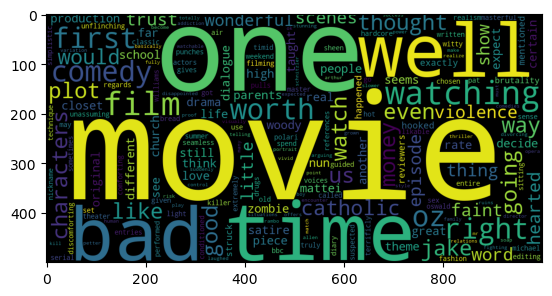

In [123]:
plt.imshow(wordcloud)
plt.show()

In [125]:
imdb_words=imdb_words.map(' '.join)

In [129]:
# Term Frequency Inverse Document Frequency (Tfidf Matrix)

# D1/S1 - The car is driven on the road
# D2/S2 - The truck is driven on the highway

# Post preprocessing
# D1/S1 - car, driven, on, road
# D2/S2 - truck, driven, on, highway

# TFIDF for car
# Term Frequency of car (TF)= 1/4 =0.25
# Inverse Document Frequency of car (IDF) = log(2/1) = log(2) = 0.6931
# TFIDF = 0.25 * 0.6931 = 0.173

# TFIDF for driven
# Term Frequency of driven (TF)= 1/4 * 1/4 =0.25*0.25=0.0625
# Inverse Document Frequency of driven (IDF) = log(2/2) = log(1) = 0
# TFIDF = 0.0625 * 0 = 0

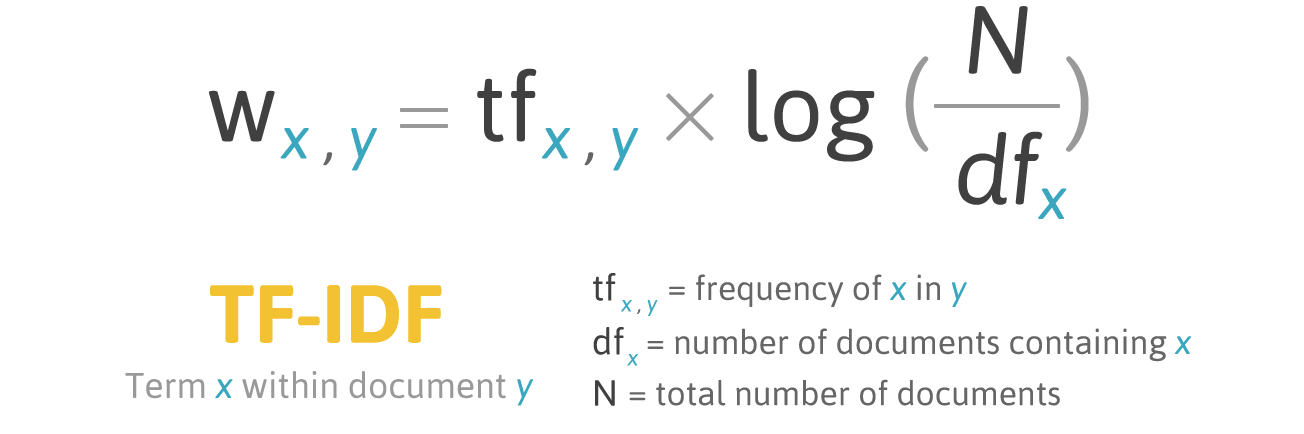

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [131]:
tfidf=TfidfVectorizer(max_features=300,stop_words="english",ngram_range=(2,2))

In [132]:
X_tfidf=tfidf.fit_transform(imdb_words)

In [134]:
pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_).head()

,worth watching,serial killer,young woman,time movie,soap opera,make film,real life,time money,film watch,new york,...,good looking,movie think,film noir,film time,sounds like,science fiction,don wrong,time watching,trying make,highly recommended
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.691582
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.520405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
y=LabelEncoder().fit_transform(imdb_reviews.sentiment)

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
logitmodel=LogisticRegression().fit(X_tfidf,y)

In [139]:
logitmodel.score(X_tfidf,y)

0.69624

In [140]:
logitpredict=logitmodel.predict(X_tfidf)

In [141]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,15499,9501
1,5687,19313


In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
treemodel=DecisionTreeClassifier().fit(X_tfidf,y)

In [144]:
treemodel.score(X_tfidf,y)

0.86762

In [145]:
treepredict=treemodel.predict(X_tfidf)

In [146]:
pd.crosstab(y,treepredict)

col_0,0,1
row_0,,
0,20172,4828
1,1791,23209


In [147]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,test_size=.5,random_state =123)

In [150]:
X_train_dense = X_train.toarray()  # Convert sparse matrix to dense array
X_test_dense = X_test.toarray()

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_dense, X_test_dense, y_train, y_test)

print(models)

 86%|████████▌ | 25/29 [50:14<03:59, 59.78s/it]   